### Evaluating our Decision Tree Implementation


---

The objective of this notebook is to perform a series of benchmarks between the sci-kit learn decision tree regression algorithm and our own implementation of the same algorithm.

First, import both implementations as well as some helpful tools.

In [1]:
from main import *
import numpy as np
from sklearn.tree import DecisionTreeRegressor as sci_dtr
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt


Lets start by evaluating the models on a simple data set with simple feature dynamics. A univariate linear model with white noise.

$$ y_{i} = x_{i}w + \epsilon_{i} $$

In [2]:
X = np.random.normal(0,5,(100, 1))
W = np.ones(1)
Y = np.dot(X, W) + np.random.normal(0, 1, 100)

train_X = X[:80]
test_X = X[80:]
train_Y = Y[:80]
test_Y = Y[80:]


We create an 80/20 train test split for evaluation purposes and select our error measure as 
$$ R^{2} =  1 - \sum_{n=1}^{100} \frac{(y_{i} - \hat{y_{i}})^{2}}{(y_{i} - \overline{y})^{2}}$$

In [3]:
dtr = DecisionTreeRegressor(max_depth=5)
sk_dtr = sci_dtr(max_depth=5)
dtr.fit(train_X, train_Y)
sk_dtr.fit(train_X,train_Y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Before we measure the model error over our test set, lets take a look at the representations each model has built of the relationship between y and x.

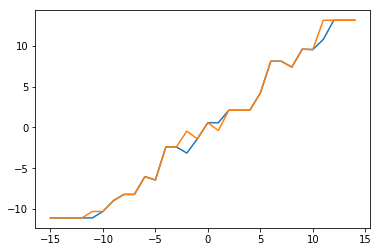

In [4]:
plt.plot(range(-15, 15), [dtr.predict(np.array([i])) for i in range(-15,15)])
plt.plot(range(-15, 15), [sk_dtr.predict(np.array([i]).reshape(1,-1)) for i in range(-15,15)])

At a glance they look very similar but not identical, this must be due to subtle differences in the decision boundary evaluation process.

In [5]:
print('Simple-ML Decision Tree r2_score: ', r2_score(test_Y, [dtr.predict(x) for x in test_X]))
print('Sci-Kit-Learn Decision Tree r2_score: ', r2_score(test_Y, sk_dtr.predict(test_X)))

Simple-ML Decision Tree r2_score:  0.9524575319881073
Sci-Kit-Learn Decision Tree r2_score:  0.9524575319881073


We get very similar performance between the two. So far so good. Lets try something a bit more complex, a multivariate linear model with white noise on a larget dataset. This will test the ability of the models to build deeper decision boundaries and test the speed of the model on a larger dataset.

$$ Y_{i} = X_{i}W + \epsilon_{i} $$

In [6]:
X = np.random.normal(0,5,(500, 20))
W = np.random.normal(5,3, 20)
Y = np.dot(X, W)

train_X = X[:400]
test_X = X[400:]
train_Y = Y[:400]
test_Y = Y[400:]

In [7]:
import time
from datetime import timedelta
print(timedelta(seconds=(time.time() - time.time())))

0:00:00


In [8]:
import time
from datetime import timedelta
dtr_start = time.time()
dtr = DecisionTreeRegressor(max_depth=10)
dtr.fit(train_X, train_Y)
print('simple-ml training time: ', timedelta(seconds=(time.time() - dtr_start)),'seconds')

sk_dtr_start = time.time()
sk_dtr = sci_dtr(max_depth=10)
sk_dtr.fit(train_X, train_Y)
print('sk-learn training time: ', timedelta(seconds=(time.time() - sk_dtr_start)),'seconds')


simple-ml training time:  0:00:03.482923 seconds
sk-learn training time:  0:00:00.003917 seconds


Our implementation is exceptionally slow compared to the sklearn implementation. This could be due to the more extensive use of numpy and scipy in the sklearn implementation. In order to achieve better performance it would be valuable to consider how to represent the tree structure such that it could take better advantage of numpy data structures.

In [9]:
print('Simple-ML Decision Tree r2_score: ', r2_score(test_Y, [dtr.predict(x) for x in test_X]))
print('Sci-Kit-Learn Decision Tree r2_score: ', r2_score(test_Y, sk_dtr.predict(test_X)))

Simple-ML Decision Tree r2_score:  0.3385032714524815
Sci-Kit-Learn Decision Tree r2_score:  0.2623677437710664


We se again our actual model performance on the test set is comparable to that of sklearns performance. Thus the main drawbacks as far as I can tell of our implementation are computational.